# Importing Modules

In [2]:
import import_ipynb
import GeoProcess as gp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


DATA_PATH = '/media/h_mittal/My Data 2/Dissertation/ASDUSI/processing_outputs/snappy/Dataset_963A/BufferedLandMasked_Amplitude_VH.tif'
OUT_PATH = '/media/h_mittal/My Data 2/Dissertation/ASDUSI/processing_outputs/snappy/Dataset_963A/PrincipleCFAR_Results'

importing Jupyter notebook from GeoProcess.ipynb


In [22]:
def find_threshold(data,components):
    s_pca = PCA(n_components=components)
    for_s_pca = s_pca.fit_transform(data)
    #plt.imshow(for_s_pca,cmap='gray')
    #Image.fromarray(for_s_pca).show()

    max_v = for_s_pca[:,0]
    min_v = for_s_pca[:,(components-1)]
    threshold = (max_v.std() + min_v.std())/2
    print(threshold)

    inv_s_pca = s_pca.inverse_transform(for_s_pca)
    
    return (inv_s_pca,threshold)
    #return threshold

def getDetectedShip(img,threshold):
    rows,cols = img.shape
    ship_p = []
    nonShip_p = []
    temp = img.reshape(rows*cols,1)

    for d in range(len(temp)):
        if temp[d] < threshold:
            #nonShip_p.append(temp[d])
            temp[d] = 0
        else:
            #ship_p.append(temp[d])
            temp[d] = 1

    fin_img = temp.reshape(rows,cols)
    #plt.imshow(fin_img,cmap='gray')
    #plt.imsave('Output_fromPCA.tiff',fin_img,cmap='gray')
    return (fin_img,ship_p,nonShip_p)

In [3]:
#Computing rows and columns
geoPro = gp.geoProcessing(DATA_PATH,OUT_PATH)
band_data_arr = geoPro.readGeoTiff()
rows,col = band_data_arr.shape
print(rows,col)
#gp.visualizeImg(band_data_arr)

10201 10596


In [17]:
computed_threshold = find_threshold(band_data_arr,1)
threshold_diff = 1000
component_no = 2

while (threshold_diff) > 0.01:
    threshold = find_threshold(band_data_arr,component_no)
    threshold_diff = abs(computed_threshold - threshold)
    computed_threshold = threshold
    component_no += 1
    print("Threshold Difference: ",threshold_diff)
    
print(computed_threshold)

677.9531860351562
622.1824951171875
Threshold Difference:  55.77069091796875
534.73046875
Threshold Difference:  87.4520263671875
493.6078186035156
Threshold Difference:  41.122650146484375
476.10723876953125
Threshold Difference:  17.500579833984375
434.6996154785156
Threshold Difference:  41.407623291015625
427.57928466796875
Threshold Difference:  7.120330810546875
423.365234375
Threshold Difference:  4.21405029296875
413.4849548339844
Threshold Difference:  9.880279541015625
405.5520324707031
Threshold Difference:  7.93292236328125
401.08148193359375
Threshold Difference:  4.470550537109375
397.5558776855469
Threshold Difference:  3.525604248046875
392.74493408203125
Threshold Difference:  4.810943603515625
385.8368835449219
Threshold Difference:  6.908050537109375
384.64129638671875
Threshold Difference:  1.195587158203125
382.60308837890625
Threshold Difference:  2.0382080078125
378.88641357421875
Threshold Difference:  3.7166748046875
378.1564636230469
Threshold Difference:  0.7

In [18]:
print(component_no)

83


338.9764709472656


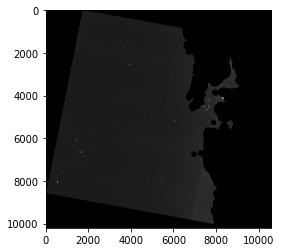

In [26]:
img,thre = find_threshold(band_data_arr,10201)

In [28]:
geoPro.save_img2Geotiff(img,"/test.tif")

Image Saved Succesfully.


In [4]:
data = band_data_arr.reshape(band_data_arr.shape[0]*band_data_arr.shape[1],1)

In [1]:
from KDEpy import FFTKDE

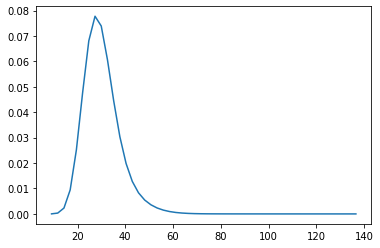

In [13]:
x,y = FFTKDE(kernel="gaussian",bw="silverman").fit(data).evaluate()
plt.plot(x[50:100],y[50:100])